In [141]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import imageio
from PIL import Image
from sklearn.datasets import make_circles
from kmeans import *
import os

# <center>K-means Implementation</center>

<center>April 18, Eileen Wang</center>

## Context

1. K-means
- What is k-means?
- Algorithm
- Visualization and implnmentation
2. K-means++
- What is k-means++?
- Algorithm
- Visualization and implnmentation
3. Summary

### What is k-means?

Here is a quote from Wikipedia:

    "k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids."
    
But what is k-means actually?  

Basically, it is a way to find different type of data in a dataset. Let's imagine, when you walk in a friend's party, you don't know anyone there. First thing you do is trying to divide people into two groups -- men and women. And that's it! that is the simplest k-means when k=2. Then, you talk to everyone in the party and you know some of them are software engineers, some are lawyers and others are doctors. Also, they tell you where are they come from. Now in your mind, you can roughly circle out similar people in the party. That's exactly how clustering and k-means work.

### Algorithm

Here is the simple algorithm written by my dear professor.


<img src="kmeans-alg.png" alt="Drawing" style="width: 600px;"/>

To put it in words, first thing to do is that randomly select k points from our dataset. They are the initial points as the center of each clustering and don't worry -- we will recalculate very soon! Next, we try to find out the TRUE centers. The way to do so is to calculate the closest center to each data points and put them into the cluster, then find out the one may be the real center in the cluster and do this again and again until the centers keep the same.

Next, we will try to make this algorithm into real things!

### Visualization and implenmentation

First of all, let's validate our kmeans by a small and simple one dimension data.

In [116]:
grades = [92.65, 93.87, 74.06, 86.94, 92.86, 94.46, 92.94, 80.65, 
          92.86, 85.94,91.79, 95.23, 85.37, 87.85, 87.71, 93.03]
k = 3

grades = np.array(grades).reshape(-1,1)
centroids, labels = kmeans(grades, k)
print("centroids: ", centroids.reshape(1,-1))
print("labels for each x: ", labels)

centroids:  [[84.07428571 94.30714286 92.65727273]]
labels for each x:  [2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2]


Hooray! As the output above, we successfully got 3 final centroids and labels for each data points. 

To make it more obvious, let's look at the following graph:

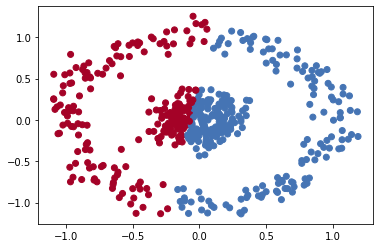

In [120]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

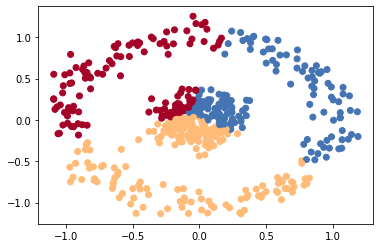

In [121]:
centroids, labels = kmeans(X, 3)
colors=np.array(['#4574B4','#A40227','#FFBB77'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

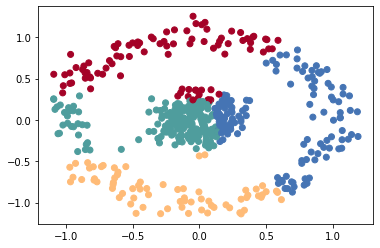

In [126]:
centroids, labels = kmeans(X, 4)
colors=np.array(['#4574B4','#A40227','#FFBB77','#4F9D9D'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

Scatter dots in the graph can be divided into k clusters as we thought.

### Image compression

As an unsupervised learning, kmeans can be applied in many processes. Image compression is the one of the most useful applications. The mechanism is that kmeans clusters the pixel with similar color. By reducing colors in the picture, we can also reduce the size of our picture dramatically.

Let's start from grayscale pictures. Here is a beautiful woman's picture I found in Google.

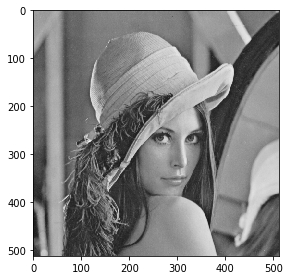

In [142]:
image = io.imread('lena.png')
io.imshow(image)
io.show()

I wrote a helper function to make our picture data more interpretable to our kmeans.

In [92]:
def convert_gray2rgb(image):
    width, height = image.shape
    out = np.empty((width, height, 3), dtype=np.uint8)
    out[:, :, 0] = image
    out[:, :, 1] = image
    out[:, :, 2] = image
    return out

image = convert_gray2rgb(image)

In [93]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [94]:
centroids,idx = kmeans(X,4,max_iters)
print(np.shape(centroids))
print(np.shape(idx))

(4, 3)
(262144,)


In [95]:
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols,3))
print(np.shape(X_recovered))

(262144, 3)
(512, 512, 3)


In [96]:
imageio.imwrite('lena_c.png', X_recovered)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


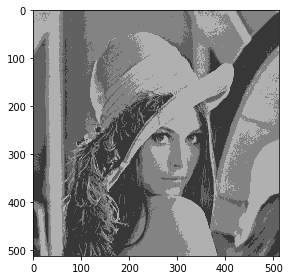

In [97]:
image_compressed = io.imread('lena_c.png')
io.imshow(image_compressed)
io.show()

In [129]:
info = os.stat('lena.png')
print("size of image before running K-mean algorithm: ",info.st_size/1024,"KB")
info = os.stat('lena_c.png')
print("size of image after running K-mean algorithm: ",info.st_size/1024,"KB")

size of image before running K-mean algorithm:  163.119140625 KB
size of image after running K-mean algorithm:  35.3369140625 KB


The size of the picture is reduced by 75%!

Noe let's move to colorful pictures. Here is a picture of the strawberry cheese cake i baked. Yum yum!

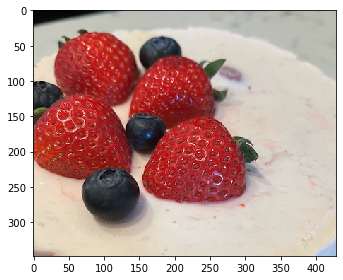

In [131]:
image = io.imread('cake.png')
io.imshow(image)
io.show()

In [132]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],4)

In [134]:
centroids,idx = kmeans(X,16,max_iter=50)
print(np.shape(centroids))
print(np.shape(idx))

(16, 4)
(149292,)


In [135]:
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols, 4))
print(np.shape(X_recovered))

(149292, 4)
(348, 429, 4)


In [136]:
imageio.imwrite('cake_c.png', X_recovered)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


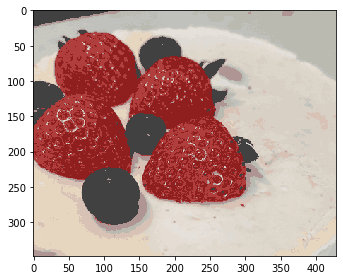

In [137]:
image_compressed = io.imread('cake_c.png')
io.imshow(image_compressed)
io.show()

In [138]:
info = os.stat('cake.png')
print("size of image before running K-mean algorithm: ",info.st_size/1024,"KB")
info = os.stat('cake_c.png')
print("size of image after running K-mean algorithm: ",info.st_size/1024,"KB")

size of image before running K-mean algorithm:  296.7353515625 KB
size of image after running K-mean algorithm:  45.1787109375 KB


# K-means++

### What is k-means++?

K-means++ is an algorithm for choosing the initial values for the k-means clustering algorithm to avoid the sometimes poor clusterings found by the standard k-means algorithm. Basically it is k-means with different way to choose centers.

### Algorithm

The algorithm is mostly the same as k-means. The major difference is the process of choosing the initial centers.
In details, let's do it step by step.
1. Randomly pick k centroids
2. Pick next k-1 points by selecting points that maximize the minimum distance to all existing cluster centroids.
3. For each point, compute the minimum distance to each cluster.
4. Among those minimum distances to clusters for each point, find the point of max distance as the new centroid.

### Visualization and implementation

In thins part, we will do the same thing as k-means

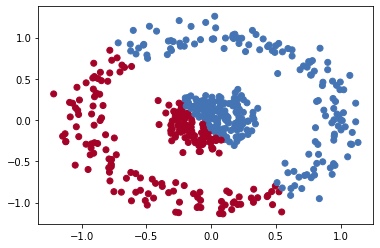

In [140]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2, centroids='kmeans++')
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

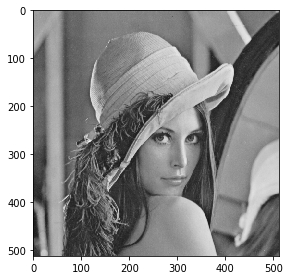

In [98]:
image = io.imread('lena.png')
io.imshow(image)
io.show()

In [99]:
image = convert_gray2rgb(image)

In [100]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],3)

In [103]:
centroids,idx = kmeans(X,4,centroids="kmeans++")
print(np.shape(centroids))
print(np.shape(idx))

(4, 3)
(262144,)


In [104]:
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols,3))
print(np.shape(X_recovered))

(262144, 3)
(512, 512, 3)


In [105]:
imageio.imwrite('lena_cplus.png', X_recovered)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


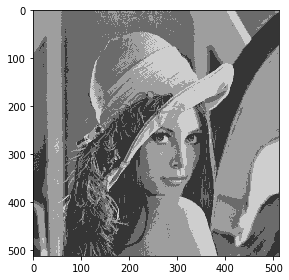

In [106]:
image_compressed = io.imread('lena_cplus.png')
io.imshow(image_compressed)
io.show()

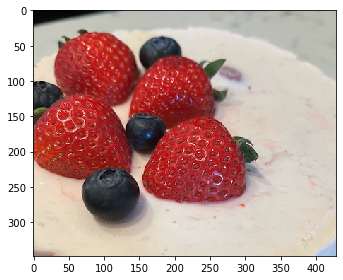

In [110]:
image = io.imread('cake.png')
io.imshow(image)
io.show()

In [111]:
rows = image.shape[0]
cols = image.shape[1]
image = image/255
X = image.reshape(image.shape[0]*image.shape[1],4)

In [112]:
centroids,idx = kmeans(X,16,centroids="kmeans++",max_iter=50)
print(np.shape(centroids))
print(np.shape(idx))

(16, 4)
(149292,)


In [113]:
X_recovered = centroids[idx]
print(np.shape(X_recovered))
X_recovered = np.reshape(X_recovered, (rows, cols, 4))
print(np.shape(X_recovered))

(149292, 4)
(348, 429, 4)


In [114]:
imageio.imwrite('cake_cplus.png', X_recovered)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


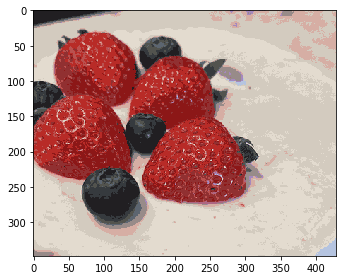

In [115]:
image_compressed = io.imread('cake_cplus.png')
io.imshow(image_compressed)
io.show()